<a href="https://colab.research.google.com/github/Hafsah2020/progress_on_SDG7/blob/main/Target%207_1/analysis/Target_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis_on_progress_towards_SDG7
### By Hafsah Anibaba


## Target 7.1: By 2030, ensure universal access to affordable, reliable and modern energy services
<b>

* Check trend in access to energy over the years
* Check countries with high access and countries with low access
* Check countries that had positive change
* Check countries that had negative change
* Check countries that had no change

## Target 7.2: By 2030, increase substantially the share of renewable energy in the global energy mix


*   What are the top countries in terms of access to clean cooking fuels
*   What are the bottom countries in terms of access to clean cooking fuels
*   Which countries had the highest positive and negative change in access





### Prerequisites



*   Import Libraries
*   Read data
*   Create Functions







In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Portfolio/Analysis on progress towards SDG7/'

Mounted at /content/drive


In [ ]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import all necessay libraies

%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def global_trends(y_axis_data, x_axis_data, title, ylabel, xlim, observation = None):
    '''
    y_axis_data: Series, data to plot on the y axis (usually the statistics in this analysis)
    x_axis_data: Series, data to plot on the x axis (usually the years in this analysis)
    title: String, Title to decribe the plot
    ylabel: String, The name of data on y axis
    xlim: Tuple, The limits of values on the x axis
    observation: String, Observation made from the data
    '''
    sns.lineplot(x = x_axis_data, y = y_axis_data)
    plt.ylim(top = 100, bottom = 0) #max is 100%
    plt.xlim(xlim[0], xlim[1])
    plt.title(title, pad = 7,
            fontdict = {'color': 'green', 'weight': 'bold'});
    plt.xlabel('years', fontdict = {'color': 'green', 'weight': 'light', 'style': 'italic'})
    plt.ylabel(ylabel, fontdict = {'color': 'green', 'weight': 'light', 'style': 'italic'});
    plt.xticks(rotation = 90);
    # plt.text(35, 97, observation, fontdict = {'color': 'blue', 'weight': 'light',\
    #                                                 'style': 'italic'});

In [ ]:

def world_cloud(data, title, width, height):
    '''
    data:  List, The list of words to generate
    title: String, Title to decribe the plot
    width: Int, Width of the plot
    height: Int, Height of the plot
    '''
    word_could_dict=Counter(data)
    wordcloud = WordCloud(width = width, height = height, background_color="black").generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.title(title, pad = 7,
         fontdict = {'color': 'green', 'weight': 'bold', 'fontsize': 12});

    plt.imshow(wordcloud, interpolation= 'bilinear')
    plt.axis("off")
    plt.show()
    # plt.savefig(f"{path}target 7_1/Analysis /visualisations/100%_access.png", bbox_inches='tight')
    #saving blank picture?


In [ ]:
def plot_trends(data, observation, title, showlegend = True):
    '''
    data: DataFrame, data to plot
    title: String, Title to decribe the plot
    showlegend: bool, If legend should be displaye
    observation: String, Observation made from the data
    '''
    plt.figure(figsize = (10,5))
    sns.lineplot(data = data)
    plt.ylim(0, 120)
    if not showlegend:
      plt.legend('', frameon=False)
    else:
      plt.legend(bbox_to_anchor = (1.5, 1))
    plt.title(title, pad = 7,
         fontdict = {'color': 'green', 'weight': 'bold', 'fontsize': 18})
    plt.text(0, -10, f'{observation}', fontdict = {'color': 'green', 'weight': 'bold', 'fontsize': 10},
        wrap =True, verticalalignment = 'top');

In [ ]:
def plot_change(plot_list, data, lowest_year, highest_year):
  '''
    plot_list:list,  Contain tuples that contain the function(e.g max or min) and the title e.g(highest or lowest) in this analysis
    data: DataFrame, data to plot
    lowest_year: string, column of lowest year
    highest_year: string, column of highest year
  '''
  change_list = []
  for i in plot_list:
      change_val = round(i[0].values[0], 1)
      country = i[0].index[0]
      val_lowest_year = round(data.loc[i[0].index][lowest_year].values[0], 1)
      val_highest_year = round(data.loc[i[0].index][highest_year].values[0], 1)
      text = f'The country with the {i[1]} change is {country} with {change_val} it had {val_lowest_year} in {lowest_year} and {val_highest_year} in {highest_year}'
      change_list.append(text)
  for i in change_list:
      plt.text(0, change_list.index(i), i, fontdict = {'color': 'green', 'fontsize': 'x-large'})
      plt.axis('off');

In [ ]:
#read in the data available for all countries on access to electricity

data1 = pd.read_csv(f'{path}target 7_1/extracted_data/years_with_data_for_all_countries.csv', index_col = 'Country Name')

data1.head(2)

2009       2010        2011        2012  \
Country Name                                                                 
Aruba                        100.000000  93.356293  100.000000  100.000000   
Africa Eastern and Southern   26.181557  27.557137   29.089827   31.844384   

                                  2013        2014       2015        2016  \
Country Name                                                                
Aruba                        100.00000  100.000000  100.00000  100.000000   
Africa Eastern and Southern   31.79416   32.001027   33.87191   38.880173   

                                   2017        2018       2019        2020  
Country Name                                                                
Aruba                        100.000000  100.000000  100.00000  100.000000  
Africa Eastern and Southern   40.261358   43.061877   44.27086   45.803485

In [ ]:

#read in the data of countries that had data for all the years

data2 = pd.read_csv(f'{path}target 7_1/extracted_data/countries_that_had_data_for_all_years.csv', index_col = 'Country Name')

data2.head(2)

1990        1991        1992        1993   1994   1995   1996  \
Country Name                                                                   
Aruba         100.0   99.153656   99.197128   99.239914  100.0  100.0  100.0   
New Zealand   100.0  100.000000  100.000000  100.000000  100.0  100.0  100.0   

               1997   1998   1999  ...   2011   2012   2013   2014   2015  \
Country Name                       ...                                      
Aruba         100.0  100.0  100.0  ...  100.0  100.0  100.0  100.0  100.0   
New Zealand   100.0  100.0  100.0  ...  100.0  100.0  100.0  100.0  100.0   

               2016   2017   2018   2019   2020  
Country Name                                     
Aruba         100.0  100.0  100.0  100.0  100.0  
New Zealand   100.0  100.0  100.0  100.0  100.0  

[2 rows x 31 columns]

In [ ]:
data_cook = pd.read_csv(f'{path}target 7_1/extracted_data/cleaned_data_on_clean_cooking_energy.csv', index_col = 'Country Name')
data_cook.head()

2000       2001       2002       2003  \
Country Name                                                              
Africa Eastern and Southern  11.569626  11.915139  12.256994  12.603469   
Afghanistan                   6.200000   7.200000   8.200000   9.500000   
Africa Western and Central    5.101081   5.231630   5.319239   5.512478   
Angola                       41.100000  41.700000  41.700000  42.000000   
Albania                      38.200000  40.500000  43.200000  46.400000   

                                  2004       2005       2006       2007  \
Country Name                                                              
Africa Eastern and Southern  12.966106  13.374963  13.863767  14.324714   
Afghanistan                  10.900000  12.200000  13.850000  15.300000   
Africa Western and Central    5.655605   5.838553   6.069623   6.321292   
Angola                       41.900000  42.600000  42.900000  43.500000   
Albania                      49.000000  51.900000  54.800000  58.100000   

                                  2008       2009  ...       2011       2012  \
Country Name                                       ...                         
Africa Eastern and Southern  14.724122  15.172744  ...  16.027165  16.433999   
Afghanistan                  16.700000  18.400000  ...  21.800000  23.000000   
Africa Western and Central    6.556943   6.839214  ...   7.517142   7.932300   
Angola                       43.600000  43.800000  ...  44.800000  45.200000   
Albania                      60.800000  63.600000  ...  68.900000  71.300000   

                                  2013       2014       2015       2016  \
Country Name                                                              
Africa Eastern and Southern  16.789043  17.196986  17.597176  18.034249   
Afghanistan                  24.800000  26.100000  27.400000  28.600000   
Africa Western and Central    8.442625   9.000526   9.727055  10.607250   
Angola                       45.800000  46.500000  47.200000  47.800000   
Albania                      73.150000  74.600000  76.200000  77.800000   

                                  2017       2018       2019       2020  
Country Name                                                             
Africa Eastern and Southern  18.345878  18.695306  19.149942  19.501837  
Afghanistan                  29.700000  30.900000  31.900000  33.200000  
Africa Western and Central   11.591039  12.661752  13.835065  14.903839  
Angola                       48.400000  49.100000  49.500000  50.200000  
Albania                      78.700000  79.800000  80.700000  81.300000  

[5 rows x 21 columns]

### Target 7.1

In [ ]:
print(f'At least {data1.shape[0]} countries have data for {data1.shape[1]} years')

At least 264 countries have data for 12 years


In [ ]:

data1T = data1.T

data1T.head()

Country Name       Aruba  Africa Eastern and Southern  Afghanistan  \
2009          100.000000                    26.181557    46.740051   
2010           93.356293                    27.557137    42.700001   
2011          100.000000                    29.089827    43.222019   
2012          100.000000                    31.844384    69.099998   
2013          100.000000                    31.794160    68.290649   

Country Name  Africa Western and Central     Angola     Albania  Andorra  \
2009                           41.816861  33.802189  100.000000    100.0   
2010                           41.799858  34.895638  100.000000    100.0   
2011                           45.911474  34.599998  100.000000    100.0   
2012                           44.167973  37.131321   99.900002    100.0   
2013                           47.048316  38.278030  100.000000    100.0   

Country Name  Arab World  United Arab Emirates  Argentina  ...  \
2009           84.313484                 100.0  97.750656  ...   
2010           87.114863                 100.0  98.820000  ...   
2011           87.332661                 100.0  99.095352  ...   
2012           87.039588                 100.0  99.229980  ...   
2013           88.992620                 100.0  99.342674  ...   

Country Name  Virgin Islands (U.S.)    Vietnam    Vanuatu      World  \
2009                          100.0  96.099998  33.291115  82.849047   
2010                          100.0  97.430000  44.099998  83.222541   
2011                          100.0  99.000000  41.935329  82.166583   
2012                          100.0  97.889999  43.789528  84.740710   
2013                          100.0  98.554962  31.700001  85.240416   

Country Name      Samoa     Kosovo  Yemen, Rep.  South Africa     Zambia  \
2009          97.900002  99.090909    59.501240     82.599998  26.503071   
2010          96.361053  99.000000    60.675194     82.900002  22.000000   
2011          96.668571  99.375000    61.864506     83.599998  28.159010   
2012          96.826935  99.750000    52.410000     85.300003  29.012726   
2013          97.416534  99.750000    75.599998     85.199997  29.886272   

Country Name   Zimbabwe  
2009          43.369083  
2010          38.782551  
2011          36.900002  
2012          44.000000  
2013          40.498375  

[5 rows x 264 columns]

In [ ]:


# mean per year across all countries
data1T['mean per year'] = data1T.mean(axis = 1)

data1T.head()

Country Name       Aruba  Africa Eastern and Southern  Afghanistan  \
2009          100.000000                    26.181557    46.740051   
2010           93.356293                    27.557137    42.700001   
2011          100.000000                    29.089827    43.222019   
2012          100.000000                    31.844384    69.099998   
2013          100.000000                    31.794160    68.290649   

Country Name  Africa Western and Central     Angola     Albania  Andorra  \
2009                           41.816861  33.802189  100.000000    100.0   
2010                           41.799858  34.895638  100.000000    100.0   
2011                           45.911474  34.599998  100.000000    100.0   
2012                           44.167973  37.131321   99.900002    100.0   
2013                           47.048316  38.278030  100.000000    100.0   

Country Name  Arab World  United Arab Emirates  Argentina  ...    Vietnam  \
2009           84.313484                 100.0  97.750656  ...  96.099998   
2010           87.114863                 100.0  98.820000  ...  97.430000   
2011           87.332661                 100.0  99.095352  ...  99.000000   
2012           87.039588                 100.0  99.229980  ...  97.889999   
2013           88.992620                 100.0  99.342674  ...  98.554962   

Country Name    Vanuatu      World      Samoa     Kosovo  Yemen, Rep.  \
2009          33.291115  82.849047  97.900002  99.090909    59.501240   
2010          44.099998  83.222541  96.361053  99.000000    60.675194   
2011          41.935329  82.166583  96.668571  99.375000    61.864506   
2012          43.789528  84.740710  96.826935  99.750000    52.410000   
2013          31.700001  85.240416  97.416534  99.750000    75.599998   

Country Name  South Africa     Zambia   Zimbabwe  mean per year  
2009             82.599998  26.503071  43.369083      78.608207  
2010             82.900002  22.000000  38.782551      79.302329  
2011             83.599998  28.159010  36.900002      80.004736  
2012             85.300003  29.012726  44.000000      80.904409  
2013             85.199997  29.886272  40.498375      81.444199  

[5 rows x 265 columns]

In [ ]:
# mean per country from 2009 to 2020
data1T.loc['mean per country'] = data1T.mean(axis = 0)


data1T.tail()

Country Name           Aruba  Africa Eastern and Southern  Afghanistan  \
2017              100.000000                    40.261358    97.699997   
2018              100.000000                    43.061877    96.616135   
2019              100.000000                    44.270860    97.699997   
2020              100.000000                    45.803485    97.699997   
mean per country   99.446358                    35.384813    76.539070   

Country Name      Africa Western and Central     Angola     Albania  Andorra  \
2017                               48.861191  43.013260   99.889999    100.0   
2018                               51.259712  45.290001  100.000000    100.0   
2019                               51.290193  45.642799  100.000000    100.0   
2020                               52.111601  46.890610  100.000000    100.0   
mean per country                   47.465524  39.613081   99.967500    100.0   

Country Name      Arab World  United Arab Emirates   Argentina  ...  \
2017               90.324659                 100.0  100.000000  ...   
2018               88.910749                 100.0   99.989578  ...   
2019               89.999946                 100.0  100.000000  ...   
2020               90.277735                 100.0  100.000000  ...   
mean per country   88.349884                 100.0   99.475267  ...   

Country Name         Vietnam    Vanuatu      World       Samoa      Kosovo  \
2017              100.000000  62.799999  88.594052   96.800003   99.800003   
2018              100.000000  61.754513  89.566532   99.994476   99.900002   
2019               99.400002  64.590187  90.011785   99.199997  100.000000   
2020              100.000000  67.333267  90.521569  100.000000  100.000000   
mean per country   98.883022  50.864707  86.406498   98.146496   99.667160   

Country Name      Yemen, Rep.  South Africa     Zambia   Zimbabwe  \
2017                79.199997     84.400002  40.299999  44.178635   
2018                62.000000     84.699997  40.317890  45.572647   
2019                72.751076     85.000000  43.000000  46.781475   
2020                73.757927     84.385536  44.524475  52.747669   
mean per country    66.669197     84.432128  33.177408  41.782681   

Country Name      mean per year  
2017                  84.582690  
2018                  85.338844  
2019                  85.813698  
2020                  86.472613  
mean per country      82.596240  

[5 rows x 265 columns]

In [ ]:
average_access_per_country = data1T.iloc[-1]
average_access_per_country

Country Name
Aruba                          99.446358
Africa Eastern and Southern    35.384813
Afghanistan                    76.539070
Africa Western and Central     47.465524
Angola                         39.613081
                                 ...    
Yemen, Rep.                    66.669197
South Africa                   84.432128
Zambia                         33.177408
Zimbabwe                       41.782681
mean per year                  82.596240
Name: mean per country, Length: 265, dtype: float64

In [ ]:
data1T = data1T.drop(data1T.index[-1])  # drop the mean per country row

In [ ]:
data2T = data2.T
data2T['mean per year'] = data2T.mean(axis = 1)

data2T.head()

Country Name       Aruba  New Zealand      Nauru  Norway  Netherlands  \
1990          100.000000        100.0  98.999084   100.0        100.0   
1991           99.153656        100.0  99.041306   100.0        100.0   
1992           99.197128        100.0  99.083420   100.0        100.0   
1993           99.239914        100.0  99.124855   100.0        100.0   
1994          100.000000        100.0  99.164925   100.0        100.0   

Country Name    Nigeria  New Caledonia  North America  Mauritius  \
1990          27.300000      99.844307          100.0  99.041565   
1991          35.234600      99.875816          100.0  99.070679   
1992          36.099461      99.906868          100.0  99.099678   
1993          36.963646      99.937256          100.0  99.128006   
1994          37.826469      99.965080          100.0  99.154968   

Country Name  Northern Mariana Islands  ...  European Union  Estonia  Spain  \
1990                         99.853264  ...           100.0    100.0  100.0   
1991                         99.884377  ...           100.0    100.0  100.0   
1992                         99.915031  ...           100.0    100.0  100.0   
1993                         99.944923  ...           100.0    100.0  100.0   
1994                         99.971642  ...           100.0    100.0  100.0   

Country Name  Euro area  Europe & Central Asia  Denmark  Germany  Cyprus  \
1990              100.0                  100.0    100.0    100.0   100.0   
1991              100.0                  100.0    100.0    100.0   100.0   
1992              100.0                  100.0    100.0    100.0   100.0   
1993              100.0                  100.0    100.0    100.0   100.0   
1994              100.0                  100.0    100.0    100.0   100.0   

Country Name     Zambia  mean per year  
1990          13.900000      96.603169  
1991          12.752703      96.817076  
1992          19.200000      96.903275  
1993          14.213207      96.926624  
1994          14.941759      97.009092  

[5 rows x 108 columns]

In [ ]:
data1T.index = pd.to_datetime(data1T.index)
data2T.index = pd.to_datetime(data2T.index)

<a id='electricity_access'></a>

###### Access to electricity

Text(120, 50, 'Most countries have between 90 to 100% access to elecrticity, followed by about 25 countries having 45 to 50% access')

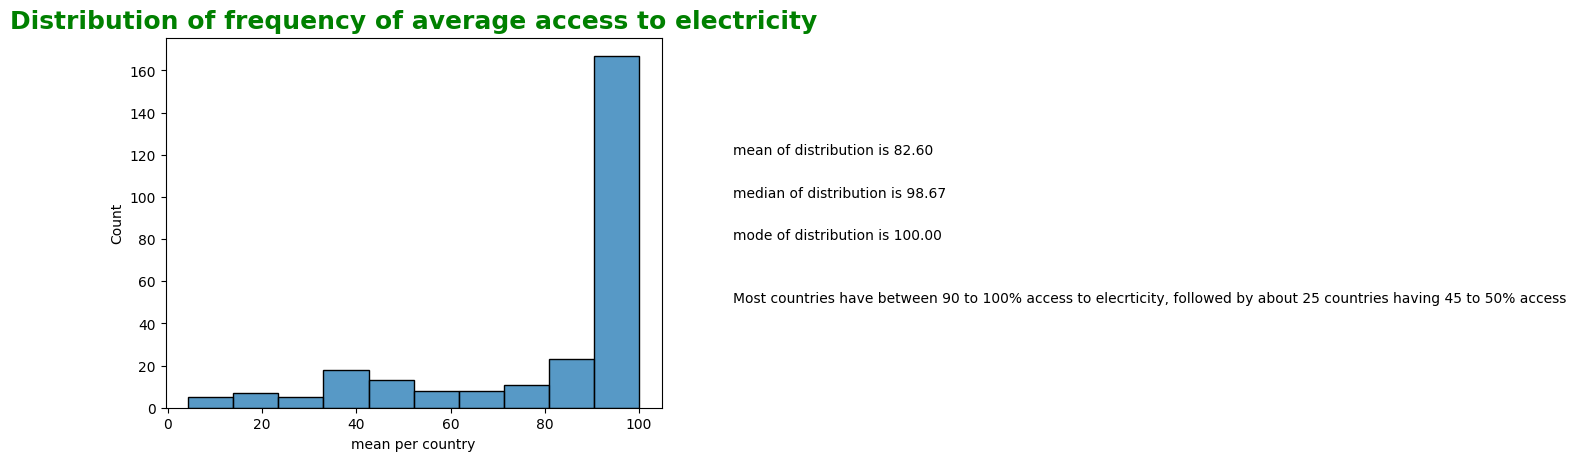

In [ ]:
plt.title('Distribution of frequency of average access to electricity', pad = 7,
         fontdict = {'color': 'green', 'weight': 'bold', 'fontsize': 18});
sns.histplot(data = average_access_per_country, bins = 10);
dist = {'mean of distribution': average_access_per_country.mean(),\
       'median of distribution': average_access_per_country.median(),\
       'mode of distribution': int(average_access_per_country.mode().values)}

for i in range(len(dist)):
    plt.text(120, 120 -(20 *i), f'{list(dist)[i]} is {dist[list(dist)[i]]:0.2f}')


plt.text(120, 50, 'Most countries have between 90 to 100% access to elecrticity, followed by about 25 countries having 45 to 50% access')


In [ ]:
full_access = average_access_per_country[average_access_per_country == 100].index.to_list()

In [ ]:
percent = (len(full_access)/ data1.shape[0]) *100
print(f'{percent:.2f}% of the countries have average of 100% of their population with \
access to electricity from 2009 to 2020')

25.38% of the countries have average of 100% of their population with access to electricity from 2009 to 2020


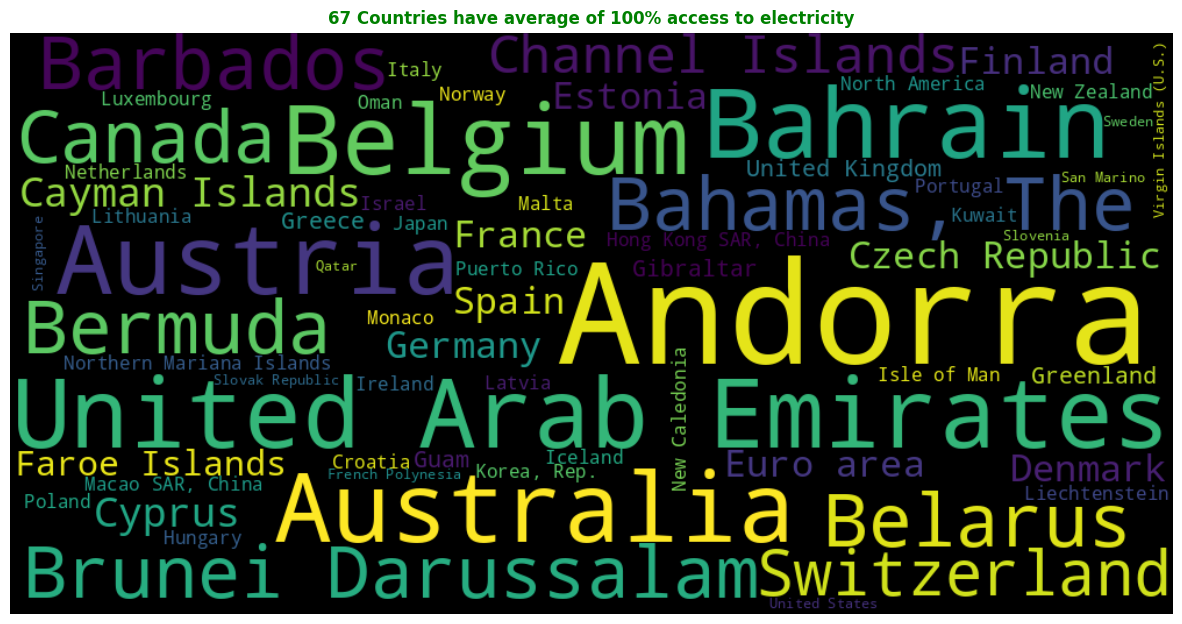

In [ ]:
world_cloud(full_access, f'{len(full_access)} Countries have average of 100% access to electricity', 1000, 500)

<b> Most countries have access between 90% to 100% to electricity between 2009 and 2020.

In [ ]:
less_access = average_access_per_country[average_access_per_country < 50].index.to_list()

In [ ]:
percent = (len(less_access)/ data1.shape[0]) *100
print(f'{percent:.2f}% of the countries have less than 50% average of their population with access to electricity')

17.05% of the countries have less than 50% average of their population with access to electricity


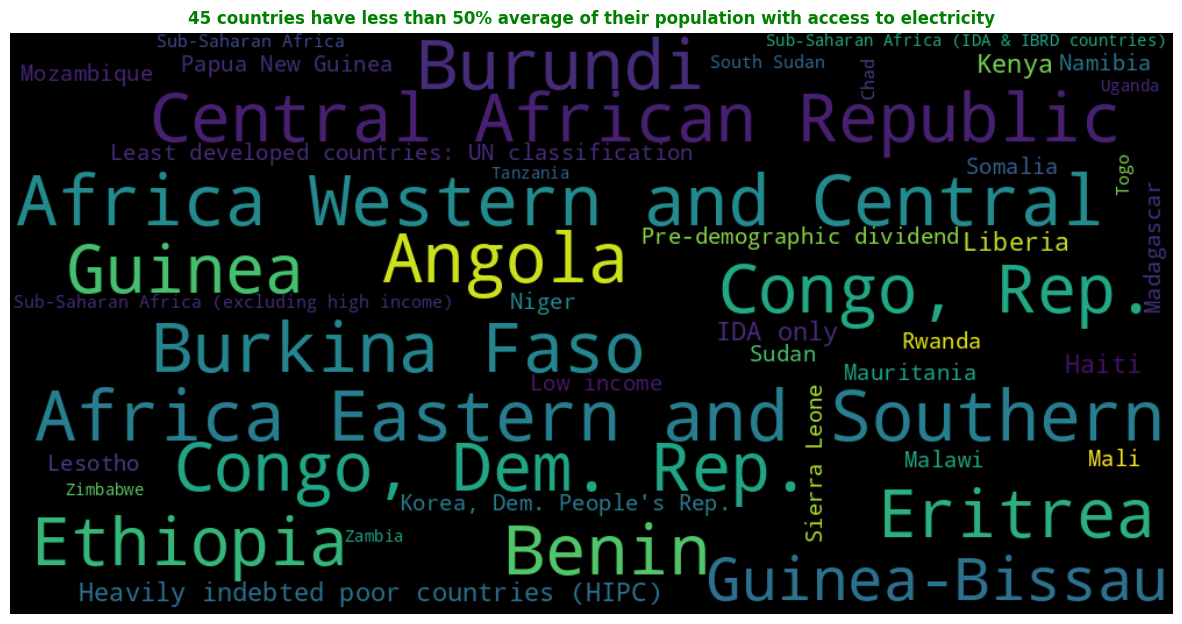

In [ ]:
world_cloud(less_access, f'{len(less_access)} countries have less than 50% average of their population with access to electricity', 1000, 500)

In [ ]:

data_change = data1.copy()
data_change.head()

2009       2010        2011        2012  \
Country Name                                                                 
Aruba                        100.000000  93.356293  100.000000  100.000000   
Africa Eastern and Southern   26.181557  27.557137   29.089827   31.844384   
Afghanistan                   46.740051  42.700001   43.222019   69.099998   
Africa Western and Central    41.816861  41.799858   45.911474   44.167973   
Angola                        33.802189  34.895638   34.599998   37.131321   

                                   2013        2014        2015        2016  \
Country Name                                                                  
Aruba                        100.000000  100.000000  100.000000  100.000000   
Africa Eastern and Southern   31.794160   32.001027   33.871910   38.880173   
Afghanistan                   68.290649   89.500000   71.500000   97.699997   
Africa Western and Central    47.048316   47.599323   46.766294   50.953487   
Angola                        38.278030   32.000000   42.000000   41.813129   

                                   2017        2018        2019        2020  
Country Name                                                                 
Aruba                        100.000000  100.000000  100.000000  100.000000  
Africa Eastern and Southern   40.261358   43.061877   44.270860   45.803485  
Afghanistan                   97.699997   96.616135   97.699997   97.699997  
Africa Western and Central    48.861191   51.259712   51.290193   52.111601  
Angola                        43.013260   45.290001   45.642799   46.890610

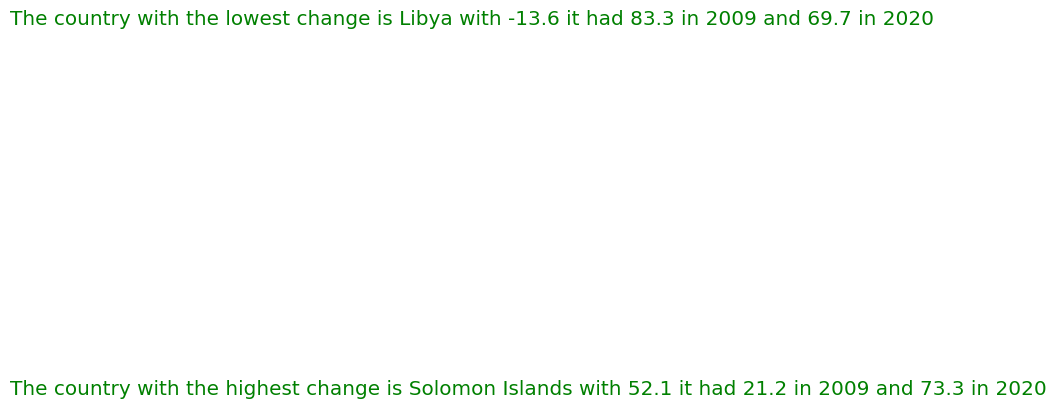

In [ ]:
change = data1['2020'] - data1['2009']
max_change = change[change == change.max()]
min_change = change[change == change.min()]
plot_change([(max_change, 'highest'), (min_change, 'lowest')], data1, '2009', '2020')

In [ ]:
data_change['change'] = data_change['2020'] - data_change['2009']

In [ ]:
positive_change = data_change[data_change['change'] > 0]
print(f'Number of countries with positive change is {len(positive_change)}')

Number of countries with positive change is 179


In [ ]:
negative_change = data_change[data_change['change'] < 0]
print(f'Number of countries with negative change is {len(negative_change)}')

Number of countries with negative change is 6


In [ ]:

no_change = data_change[data_change['change'] == 0]

print(f'Number of countries with no change is {len(no_change)}')

Number of countries with no change is 79


In [ ]:

high = str(data_change[data_change['change'] == data_change['change'].max()].index[0])
print(f'The country with highest change is {high}')

The country with highest change is Solomon Islands


In [ ]:
low = str(data_change[data_change['change'] == data_change['change'].min()].index[0])
print(f'The country with highest change is {low}')

The country with highest change is Libya


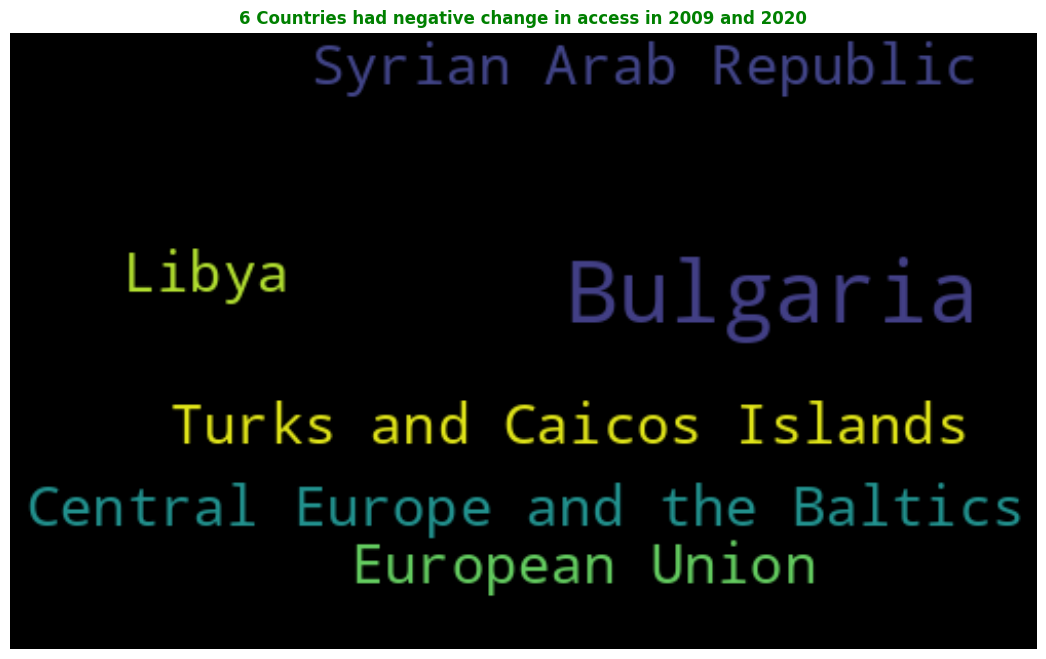

In [ ]:

world_cloud(negative_change.index.to_list(), f'{len(negative_change.index.to_list())} Countries had negative change in access in 2009 and 2020', 500, 300)

In [ ]:
num_no_change = len(no_change.index.to_list())
print(f'{num_no_change} have the same access in 2020 as 2009')

79 have the same access in 2020 as 2009


In [ ]:
no_change

2009        2010   2011        2012   2013  \
Country Name                                                         
Aruba                  100.0   93.356293  100.0  100.000000  100.0   
Albania                100.0  100.000000  100.0   99.900002  100.0   
Andorra                100.0  100.000000  100.0  100.000000  100.0   
United Arab Emirates   100.0  100.000000  100.0  100.000000  100.0   
Australia              100.0  100.000000  100.0  100.000000  100.0   
...                      ...         ...    ...         ...    ...   
Slovenia               100.0  100.000000  100.0  100.000000  100.0   
Sweden                 100.0  100.000000  100.0  100.000000  100.0   
Ukraine                100.0  100.000000  100.0   99.867493  100.0   
United States          100.0  100.000000  100.0  100.000000  100.0   
Virgin Islands (U.S.)  100.0  100.000000  100.0  100.000000  100.0   

                             2014        2015        2016        2017   2018  \
Country Name                                                                   
Aruba                  100.000000  100.000000  100.000000  100.000000  100.0   
Albania                 99.949997   99.980003   99.889999   99.889999  100.0   
Andorra                100.000000  100.000000  100.000000  100.000000  100.0   
United Arab Emirates   100.000000  100.000000  100.000000  100.000000  100.0   
Australia              100.000000  100.000000  100.000000  100.000000  100.0   
...                           ...         ...         ...         ...    ...   
Slovenia               100.000000  100.000000  100.000000  100.000000  100.0   
Sweden                 100.000000  100.000000  100.000000  100.000000  100.0   
Ukraine                100.000000  100.000000  100.000000  100.000000  100.0   
United States          100.000000  100.000000  100.000000  100.000000  100.0   
Virgin Islands (U.S.)  100.000000  100.000000  100.000000  100.000000  100.0   

                        2019   2020  change  
Country Name                                 
Aruba                  100.0  100.0     0.0  
Albania                100.0  100.0     0.0  
Andorra                100.0  100.0     0.0  
United Arab Emirates   100.0  100.0     0.0  
Australia              100.0  100.0     0.0  
...                      ...    ...     ...  
Slovenia               100.0  100.0     0.0  
Sweden                 100.0  100.0     0.0  
Ukraine                100.0  100.0     0.0  
United States          100.0  100.0     0.0  
Virgin Islands (U.S.)  100.0  100.0     0.0  

[79 rows x 13 columns]

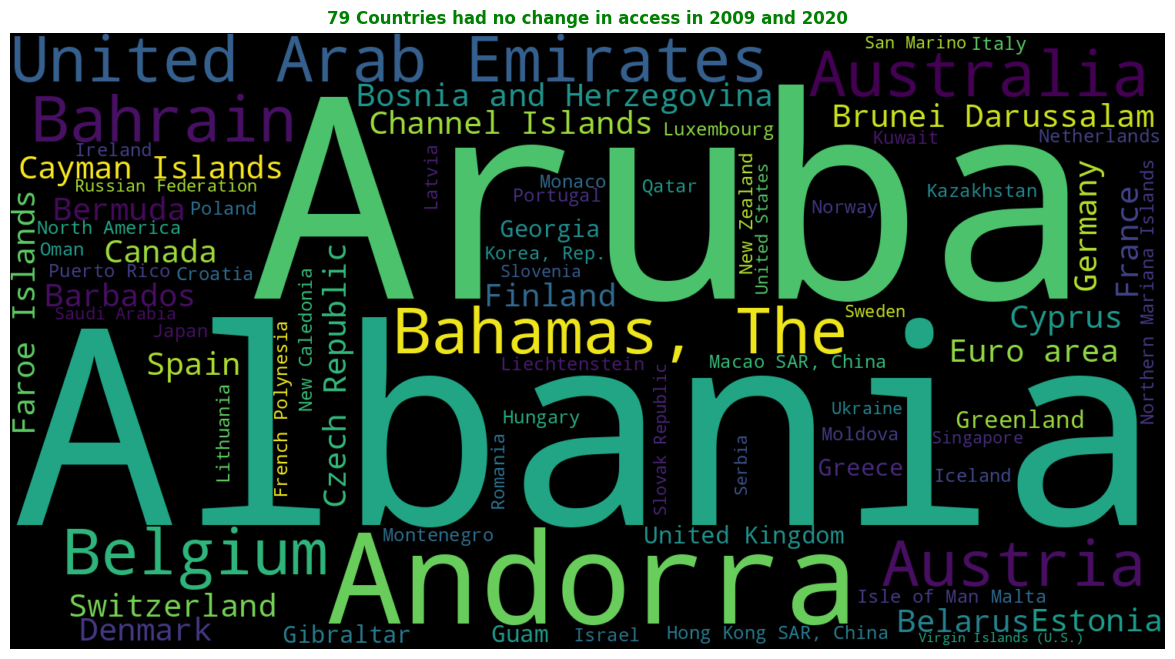

In [ ]:

world_cloud(no_change.index.to_list(), f'{len(no_change.index.to_list())} Countries had no change in access in 2009 and 2020', 1500, 800)

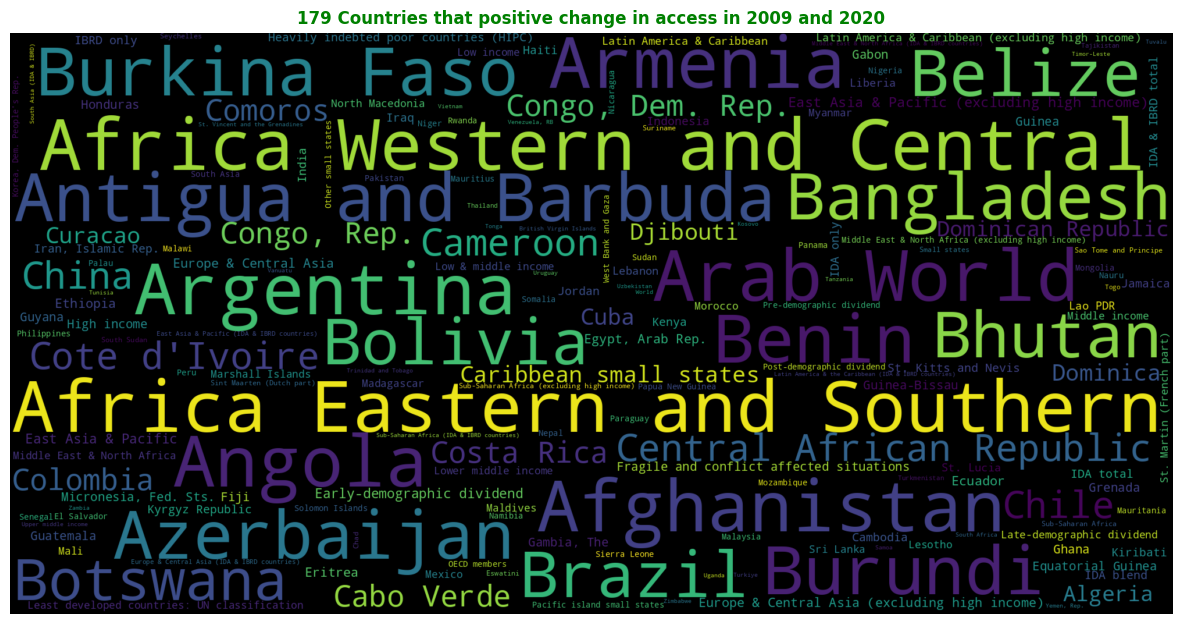

In [ ]:
world_cloud(positive_change.index.to_list(), f'{len(positive_change.index.to_list())} Countries that positive change in access in 2009 and 2020', 2000, 1000)

<a id='
###### Trends in access to electricity over the years

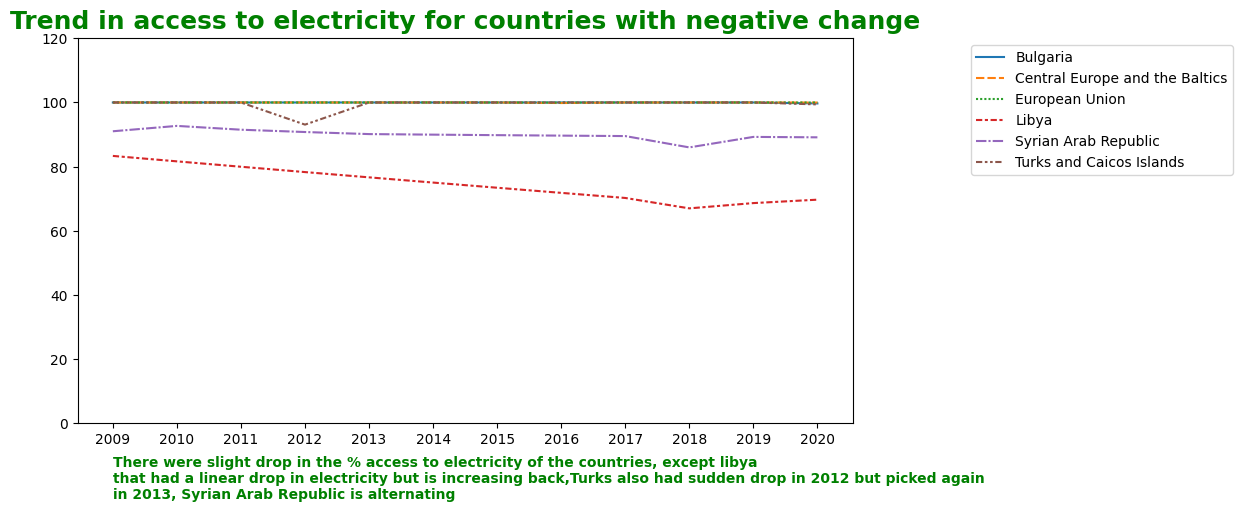

In [ ]:
plot_data = negative_change.iloc[:,:-1].T
observation = '''There were slight drop in the % access to electricity of the countries, except libya
that had a linear drop in electricity but is increasing back,Turks also had sudden drop in 2012 but picked again
in 2013, Syrian Arab Republic is alternating'''
title = 'Trend in access to electricity for countries with negative change'
plot_trends(plot_data, observation, title)

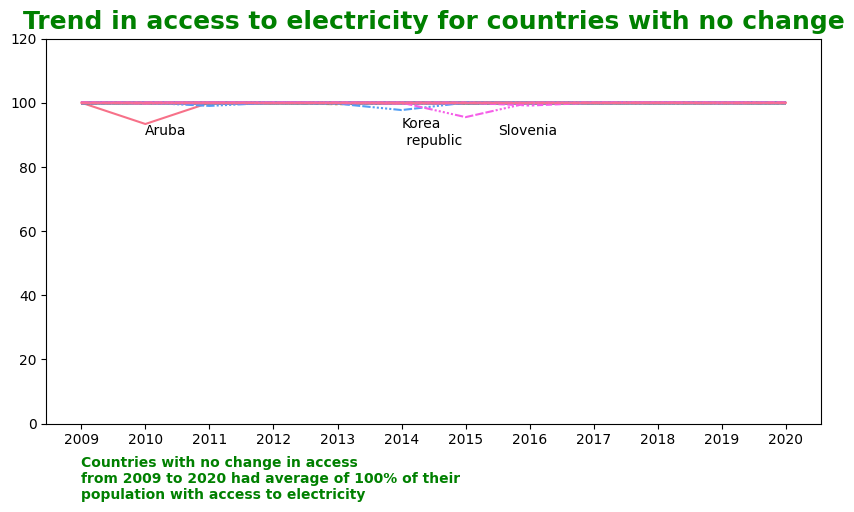

In [ ]:
plot_data = no_change.iloc[:,:-1].T
observation = '''Countries with no change in access
from 2009 to 2020 had average of 100% of their
population with access to electricity'''
title = 'Trend in access to electricity for countries with no change'
plot_trends(plot_data, observation, title, False)
plt.text(1, 90, 'Aruba')
plt.text(6.5, 90, 'Slovenia')
plt.text(5, 87, 'Korea\n republic');

<b>many countries had positive change I want to check trend in countries that had higher than 30% change from 2009 to 2020

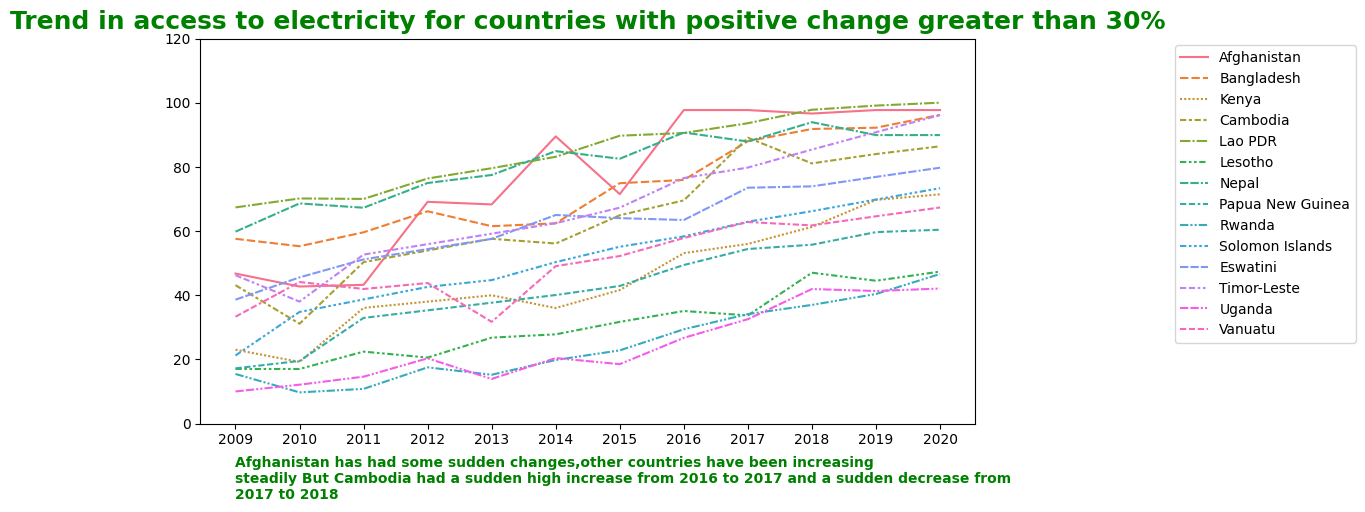

In [ ]:
greater_than_30 = positive_change[positive_change['change'] > 30]
plot_data = greater_than_30.iloc[:,:-1].T
observation = '''Afghanistan has had some sudden changes,other countries have been increasing
steadily But Cambodia had a sudden high increase from 2016 to 2017 and a sudden decrease from
2017 t0 2018'''
title = 'Trend in access to electricity for countries with positive change greater than 30%'
plot_trends(plot_data, observation, title)

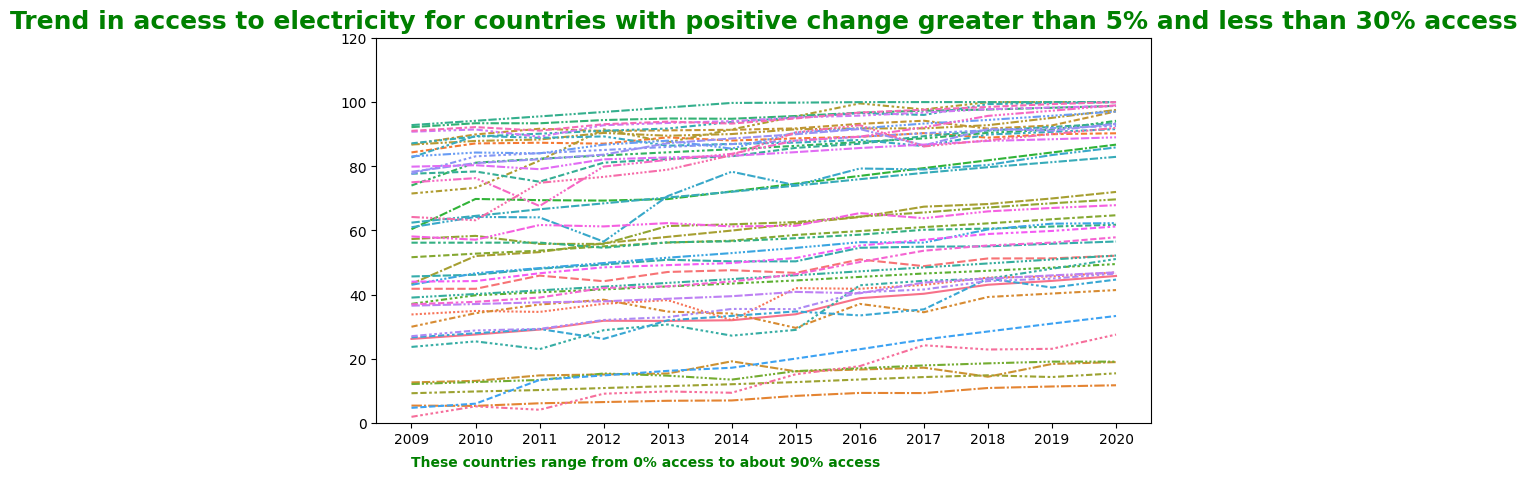

In [ ]:
greater_than_5 = positive_change[(positive_change['change'] > 5) & (positive_change['change'] < 30)]
length = len(greater_than_5)
plot_data = greater_than_5.iloc[:length // 2,:-1].T
observation = '''These countries range from 0% access to about 90% access'''
title = 'Trend in access to electricity for countries with positive change greater than 5% and less than 30% access'
plot_trends(plot_data, observation, title, False)

<b> Because many countries had less than 5% change I will divide them into two parts for visualisation

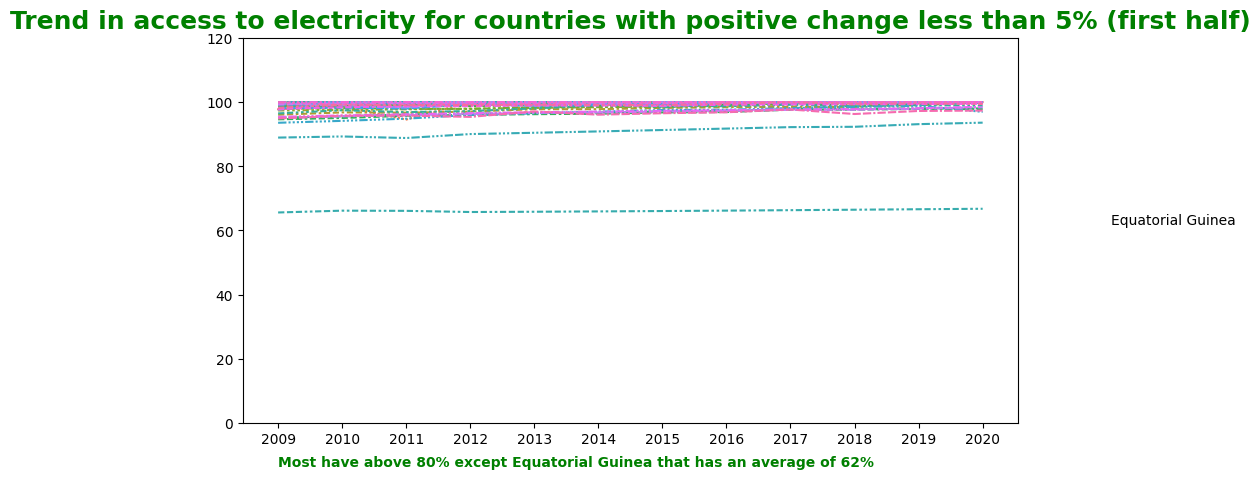

In [ ]:
less_than_5 = positive_change[positive_change['change'] < 5]
length = len(less_than_5)
plot_data = less_than_5.iloc[:length // 2,:-1].T
observation = '''Most have above 80% except Equatorial Guinea that has an average of 62%'''
title = 'Trend in access to electricity for countries with positive change less than 5% (first half)'
plot_trends(plot_data, observation, title, False)
plt.text(13, 62, 'Equatorial Guinea');

Text(13, 82, 'South Africa')

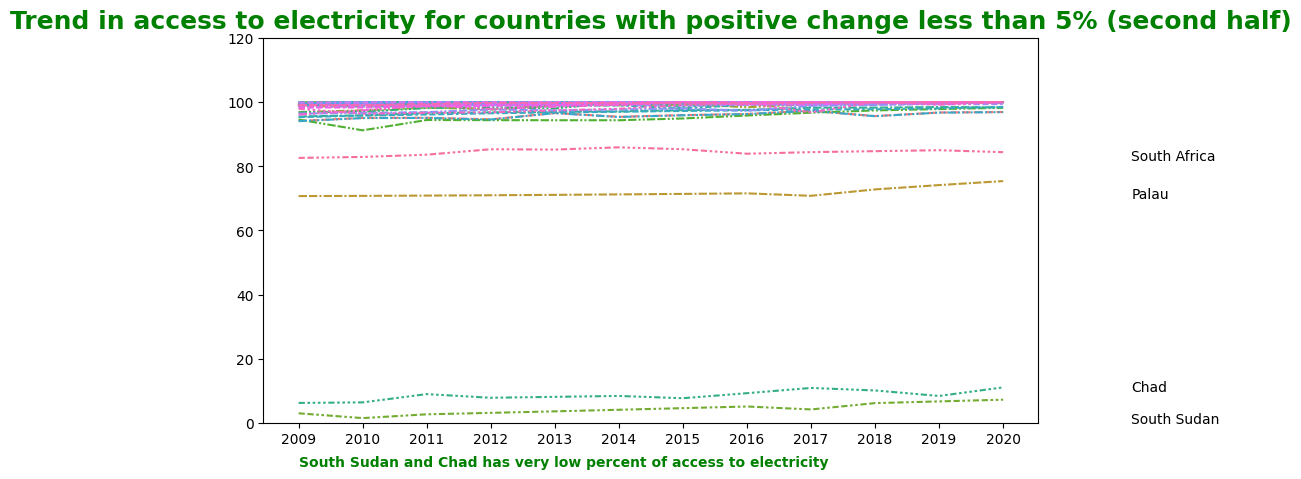

In [ ]:
less_than_5 = positive_change[positive_change['change'] < 5]
length = len(less_than_5)
plot_data = less_than_5.iloc[length // 2:,:-1].T
observation = '''South Sudan and Chad has very low percent of access to electricity'''
title = 'Trend in access to electricity for countries with positive change less than 5% (second half)'
plot_trends(plot_data, observation, title, False)
plt.text(13, 0, 'South Sudan')
plt.text(13, 10, 'Chad')
plt.text(13, 70, 'Palau')
plt.text(13, 82, 'South Africa')

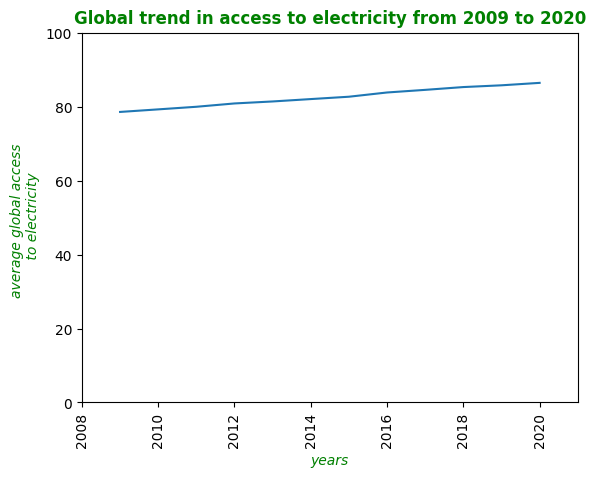

In [ ]:
global_trends(data1T['mean per year'],data1T.index, 'Global trend in access to electricity from 2009 to 2020',\
             'average global access \n to electricity', (pd.Timestamp('2008-01-01'),pd.Timestamp('2021-01-01')), )

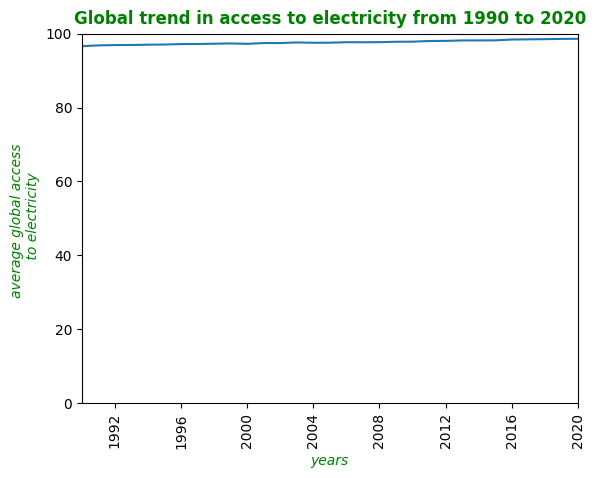

In [ ]:
global_trends(data2T['mean per year'].values, data2T.index, 'Global trend in access to electricity from 1990 to 2020',\
              'average global access \n to electricity', (pd.Timestamp('1990-01-01'), pd.Timestamp('2020-01-01')))

### Target 7.2

<a id='top_cooking'></a>
**I want to check countries that are doing 100%**

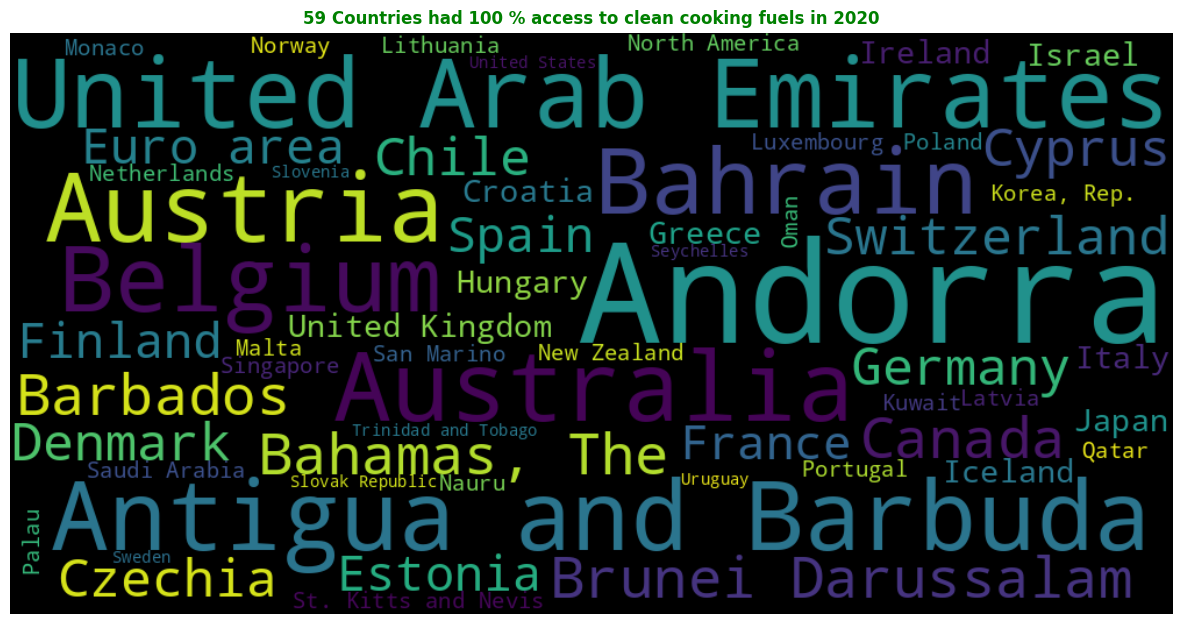

In [ ]:
access_100 = data_cook[data_cook['2020'] == 100]
num = len(access_100)
world_cloud(access_100.index.to_list(), f'{num} Countries had 100 % access to clean cooking fuels in 2020', 1000, 500)

<a id='bottom_countries'></a>
<b>I want to check countries that are doing below 50%</b>

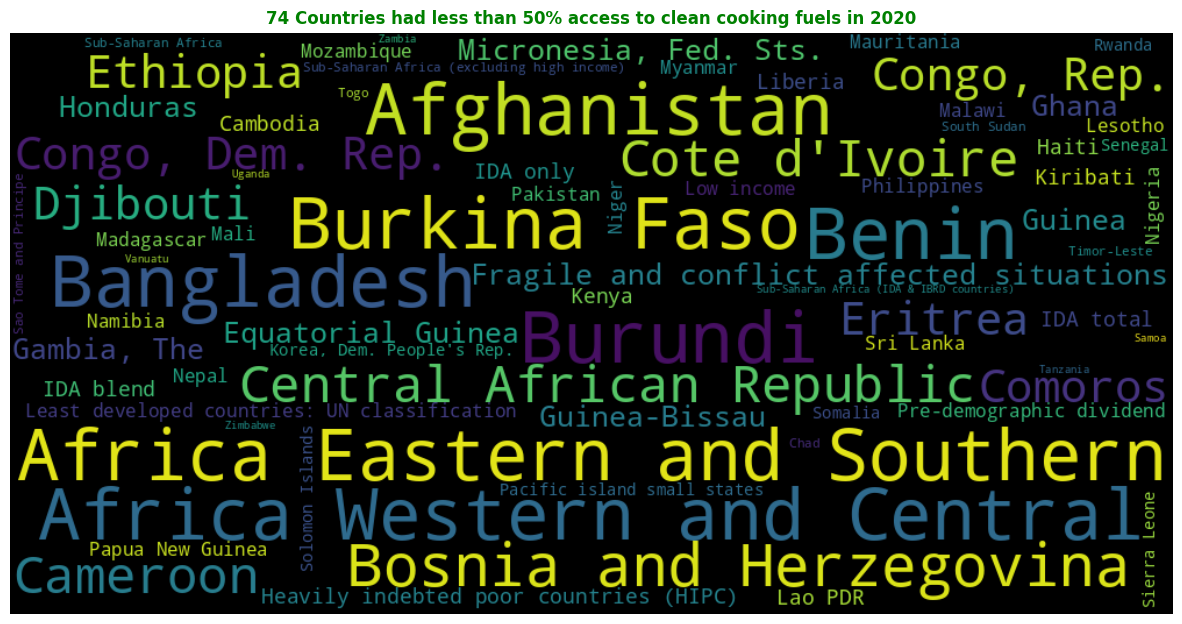

In [ ]:
access_less_50 = data_cook[data_cook['2020'] < 50]
num = len(access_less_50)
world_cloud(access_less_50.index.to_list(), f'{num} Countries had less than 50% access to clean cooking fuels in 2020', 1000, 500)

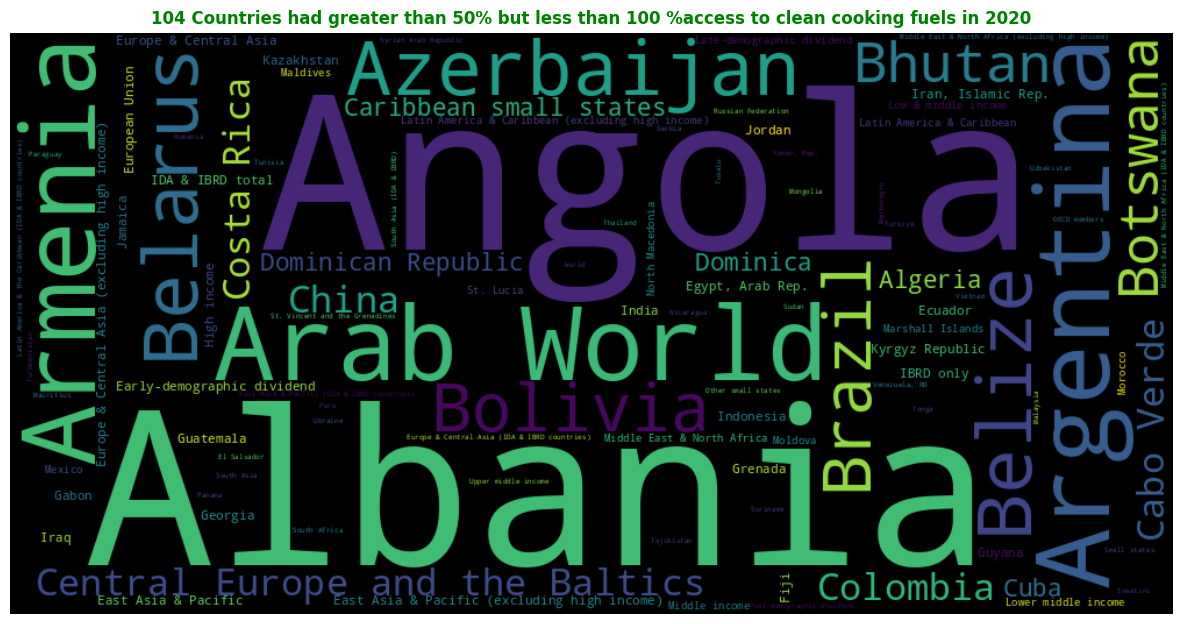

In [ ]:
access_greater_50_less_100 = data_cook[(data_cook['2020'] > 50) & (data_cook['2020'] < 100)]
num = len(access_greater_50_less_100)
world_cloud(access_greater_50_less_100.index.to_list(), f'{num} Countries had greater than 50% but less than 100 %access to clean cooking fuels in 2020',\
            1000, 500)

##### Global trend


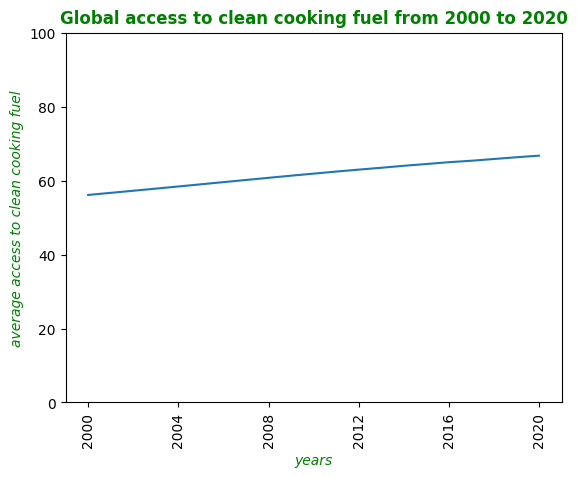

In [ ]:
global_ = data_cook.mean(axis = 0)
y = global_.values
x = pd.to_datetime(global_.index)

global_trends(y, x, 'Global access to clean cooking fuel from 2000 to 2020', 'average access to clean cooking fuel',(pd.Timestamp('01-01-1999'),\
                                                                                                                     pd.Timestamp('01-01-2021')))

<a id='change_access'>change in access</a>





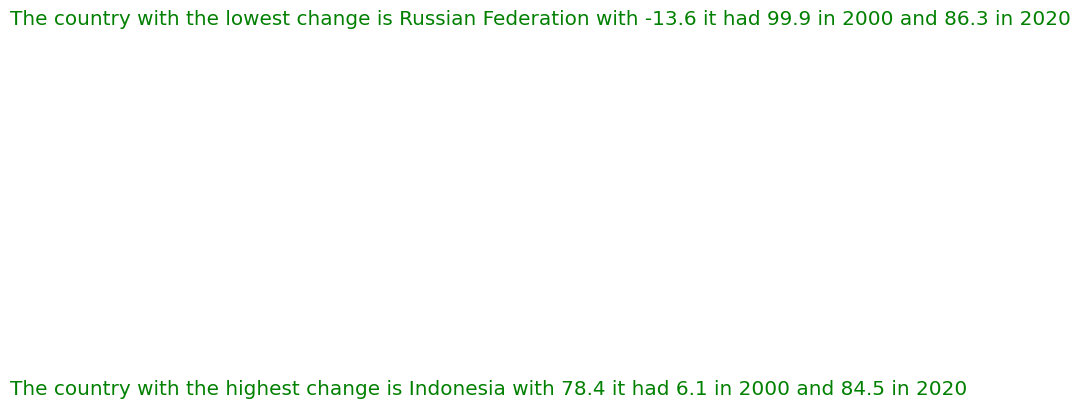

In [ ]:
change = data_cook['2020'] - data_cook['2000']
max_change = change[change == change.max()]
min_change = change[change == change.min()]
plot_change([(max_change, 'highest'), (min_change, 'lowest')], data_cook, '2000', '2020')

### Conclusion
<h4>Access to electricity</h4>

* There has been considerable increase globally, although some countries decreased in access and some had flunctuation check the analysis here: [Trend in Access to electricity](#access_trend)
* Many countries have between 90 to 100 % access 67 countries had 100% of their population with access check the analysis here:[Access to electricity](#electricity_access)
* The countries that had positive change were: [positive change](positive_change)
* The countries that had negative change were: [negative change](negative_change)
* The countries that had no change were: [no change](no_change)

<h4>Access to clean cooking fuels</h4>

* Countries that have 100 of their popolation with access are: [Top](top_cooking)
* Countries that had less than 50% are: [Bottom](bottom_countries)
* While some increased in access some decreased in access. The country that had the highest increase and country with the highest decrease can be seen here:[Change](change_access)



Overall, there has been considerable increase, though at a slow rate.

In [ ]:

!jupyter nbconvert Target_7_1.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | pattern 'Target_7_1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    